# Chapter 04 다양한 분류 알고리즘

## 04-1 로지스틱 회귀

> ### 데이터 준비하기

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()        ## 처음 5개 출력

print(pd.unique(fish['Species']))

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

fish_target = fish['Species'].to_numpy()

# 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


> ### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

# 사이킷런에서는 타깃값 전달한 순서가 아니라 알파벳 순서대로 정렬함
print(kn.classes_)   # <-- 정렬된 타깃값

print(kn.predict(test_scaled[:5]))

# 확률 체크
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))  # <-- 소수점 네 번째 자리까지 표기

distances, indexes = kn.kneighbors(test_scaled[3:4])  # 2차원 배열 받아야됨. np 슬라이싱은 2차원 배열 반환함
print(train_target[indexes])

0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


> ### 로지스틱 회귀
* 이름은 회귀이지만 분류 모델. 선형 방정식을 학습

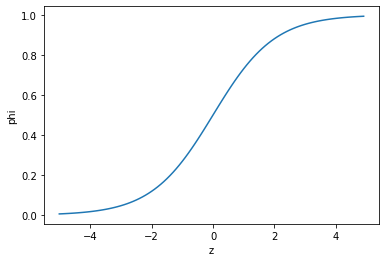

In [ ]:
# 시그모이드 함수
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

> ### 로지스틱 회귀로 이진 분휴 수행하기

In [ ]:
# 불리언 인덱싱
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

# 도미와 빙어 행 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')  # 도미와 빙어의 행 True로 반환
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

print(lr.classes_)   # 인덱스 1 이 양성 클래스. 즉, 0.5보다 큰거

print(lr.coef_, lr.intercept_)

# decision_function()으로 z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값을 확률로 변환
from scipy.special import expit
print(expit(decisions))


['A' 'C']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


> ### 로지스틱 회귀로 다중 분류 수행하기
* LogisticRegression은 반복적 알고리즘 사용
* max_iter 매개변수 에서 반복 횟수 지정, 기본값 100
* 릿지와 유사하게 계수의 제곱을 규제, L2 규제라고함
* 매개변수 C로 규제함. 작을수록 규제가 커짐

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print(lr.classes_)

# 다중 분류의 매개변수 크기 확인
print(lr.coef_.shape, lr.intercept_.shape)

# 소프트맥스 함수로 확률변환
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)     ##  <-- axis=1로 지정해서 각 행에서 연산
print(np.round(proba, decimals=3))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)
[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 4-2 확률적 경사 하강법

> ### 점진적인 학습
훈련 데이터가 한 번에 준비되지 않고 조금씩 전달되는 경우, 아ㅠ서 훈련한 모델을 버리지 않고 계속해서 업데이트 하는 방식이 필요. 이런 식의 훈련 방식을 점진적 합습이라고 부르고 그 중 대표적인 점진적 학습 알고리즘은 '확률적 경사 하강법' 이다.

> ### 확률적 경사 하강법
* 확률적이란 말은 훈련셋에서 랜덤하게 하나의 샘플을 골라 경사 하강법을 수행하는것
* 에포크는 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 말함
* 미니배치 경사 하강법은 하나가 아닌 무작위 여러개의 샘플을 통해 경사하강법을 수행하는 것
* 배치 경사 하강법은 전체 샘플을 사용

> ### 손실 함수
어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준



> ### 로지스틱 손실 함수
 \- log(예측확률)

> ### SGDClassifier

In [15]:
# 데이터 불러오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 테스트 세트와 훈련 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 표준화 전처리 (꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 반환!)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# partial_fit() 함수로 1 에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않음

0.773109243697479
0.775
0.8151260504201681
0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


> ### 에포크와 과대/과소적합
확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있음.


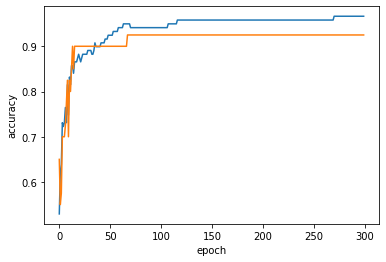

0.957983193277311
0.925
0.9495798319327731
0.925


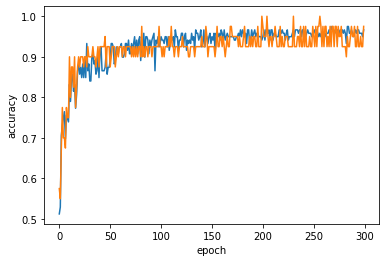

In [23]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300): # _는 임시 저장 후 폐기하는 변수
    sc.partial_fit(train_scaled, train_target, classes=classes)  # fit() 사용 안한 상태면 classses 변수값 줘야됨
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 위 그래프에서 에포크 100이 적절한 횟수임을 확인.
# epoch=100으로 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)  # SGDC는 일정 에포크 동안 성능 향상이 없으면 자동으로 멈춤
sc.fit(train_scaled, train_target)                                       # 끝까지 하게 tol 매개변수를 None으로 지정함
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 힌지 손실을 활용 (SGDC의 loss 매개변수의 기본값은 'hinge')
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 힌지 손실에서도 에포크 100이 가장 적절할까??
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300): # _는 임시 저장 후 폐기하는 변수
    sc.partial_fit(train_scaled, train_target, classes=classes)  # fit() 사용 안한 상태면 classses 변수값 줘야됨
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 그래프가 매우 다르게 나옴;;
## 알아볼 필요 Yes


> ### 핵심 패키지와 함수
> * SGDClassifier<br/>
확률적 경사 하강법을 사용한 분류 모델<br/>
loss 매개변수는 최적화할 손실 함수를 지정. 기본값은 'hinge'. 로지스틱 회귀를 위해서는 'log'로 지정<br/>
penalty 매개변수는 규제의 종류를 지정. 기본값은 l2. 규제 강도는 alpha 매개변수에서 지정함. 기본값은 0.0001.<br/>
max_iter 매개변수는 에포크 횟수를 지정. 기본값은 1000.<br/>
tol 매개변수는 반복을 멈출 조건. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단됨. tol 매개변수의 기본값은 0.001이고 n_iter_no_change 매개변수의 기본값은 5.

> * SGDRegressor<br/>
확률적 경사 하강법을 사용한 회귀 모델<br/>
loss 매개변수의 기본값은 'squared_loss'<br/>
앞의 SGDClassifier에서 설명한 모든 매개변수가 동일하게 사용됨.

